In [3]:
!pip install mpl_interactions

   ---------------------------------------- 0.0/45.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 kB ? eta -:--:--
   -------- ------------------------------- 10.2/45.5 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/45.5 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 45.5/45.5 kB 282.5 kB/s eta 0:00:00


In [5]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
from matplotlib.axis import Axis
import mpl_interactions
from mpl_interactions import ioff, panhandler, zoom_factory
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons 

import IPython.display as ipd
import math
import tensorflow as tf

In [21]:
!pip uninstall numpy
!pip install numpy
!pip install numba==0.53.0
!pip install librosa
!pip install mpl_interactions

  Using cached numba-0.53.0-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached llvmlite-0.36.0-cp39-cp39-win_amd64.whl (16.0 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
ydata-synthetic 1.2.0 requires numpy==1.23.*, but you have numpy 1.21.6 which is incompatible.
sktime 0.15.0 requires pandas<1.6.0,>=1.1.0, but you have pandas 2.0.2 which is incompatible.
pandas-profiling 3.6.0 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.0.2 which is incompatible.
pandas-profiling 3.6.0 requires requests<2.29,>=2.24.0, but you have requests 2.30.0 which is incompatible.
modin 0.18.0 requires pandas==1.5.2, but you have pandas 2.0.2 which is incompatible.
mlflow 2.1.0 requires pandas<2, but you have pandas 2.0.2 which is incompatible.
mlflow 2.1.0 requires pytz<2023, but you have pytz 2023.3 which is incompatible.
evalml 0.64.0 requires networkx<2.6,>=2.5, but you have networkx 2.8.4 which is incompatible.


In [15]:
data_path = "Desktop/nsut project"
print(os.listdir(data_path))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Desktop/nsut project'

In [17]:
df = pd.read_csv('RSH_sys.csv')

In [19]:
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,-2.487361,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123,ESM
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,10.405182,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016,ESM
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,0.990090,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780,ESM
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,0.583620,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204,ESM
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,7.754785,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024,ESM
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,-3.412969,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673,ESM
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,40.951405,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433,ESM
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,-9.572905,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136,ESM
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,-5.175992,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477,ESM
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,3.261338,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147,ESM


In [6]:
pip install numba --upgrade

  Using cached numba-0.58.1-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached llvmlite-0.41.1-cp39-cp39-win_amd64.whl (28.1 MB)
  Using cached numpy-1.26.1-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Public\\anaconda\\Lib\\site-packages\\~5mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [21]:
df['label'] = df['label'].astype('category')
# Assigning numerical values and storing in another column
df['Target'] = df['label'].cat.codes
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label,Target
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,...,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123,ESM,0
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,...,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016,ESM,0
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,...,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780,ESM,0
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,...,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204,ESM,0
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,...,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024,ESM,0
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,...,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673,ESM,0
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,...,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433,ESM,0
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,...,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136,ESM,0
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,...,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477,ESM,0
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,...,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147,ESM,0


In [23]:
df = df.drop(['label'], axis=1)
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,-2.487361,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123,0
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,10.405182,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016,0
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,0.990090,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780,0
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,0.583620,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204,0
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,7.754785,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024,0
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,-3.412969,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673,0
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,40.951405,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433,0
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,-9.572905,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136,0
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,-5.175992,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477,0
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,3.261338,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147,0


In [25]:
y = df['Target'].copy()
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
Name: Target, dtype: int8

In [27]:
x = df.drop(columns = ['Target'])
x

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,-2.487361,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,10.405182,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,0.990090,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,0.583620,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,7.754785,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,-3.412969,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,40.951405,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,-9.572905,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,-5.175992,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,3.261338,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147


In [29]:
x = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
x

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,-2.487361,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123,0
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,10.405182,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016,0
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,0.990090,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780,0
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,0.583620,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204,0
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,7.754785,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024,0
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,-3.412969,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673,0
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,40.951405,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433,0
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,-9.572905,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136,0
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,-5.175992,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477,0
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,3.261338,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147,0


In [31]:
x = x.drop(columns = ['Target'])

In [33]:
x

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,-2.487361,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,10.405182,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,0.990090,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,0.583620,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,7.754785,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,-3.412969,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,40.951405,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,-9.572905,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,-5.175992,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,3.261338,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147


In [35]:
x_data = x
y_data = y

In [37]:
data_path = r"Heartbeat_Sound"
print(os.listdir(data_path))

['artifact', 'extrahls', 'extrastole', 'murmur', 'normal', 'unlabel']


In [39]:
tarin_data      = data_path 
unlabel_data    = data_path  + "/unlabel/"

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + "/extrahls/"

In [41]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, size = input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [43]:
signals = [
    librosa.load(p)[0] for p in os.listdir(normal_data)
]
plt.figure(figsize=(100, 500))
for i, x in enumerate(signals):
    plt.subplot(25, 4, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

C:\Users\kopal\AppData\Local\Temp\ipykernel_11572\343750538.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  librosa.load(p)[0] for p in os.listdir(normal_data)
C:\Users\kopal\anaconda\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'normal_noisynormal_101_1305030823364_B.wav'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [16]:
!pip install numpy==1.21.0
!pip install pip install numba==0.53.0
!pip install librosa

  Using cached install-1.3.5-py3-none-any.whl (3.2 kB)
  Using cached numba-0.53.0-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached llvmlite-0.36.0-cp39-cp39-win_amd64.whl (16.0 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [17]:
MFCCs = librosa.feature.mfcc(y = normal_sound_sample, sr = sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

NameError: name 'normal_sound_sample' is not defined

In [ ]:
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

In [18]:
MAX_SOUND_CLIP_DURATION=10

Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_F.wav
fixing audio lenght : Bunlabelledtest__101_1305030823364_F.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__103_1305031931979_A.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__103_1305031931979_C.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__105_1305033453095_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabe

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__145_1307987561278_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__146_1306778707532_C.wav
fixing audio lenght : Bunlabelledtest__146_1306778707532_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__146_1306778707532_D31.wav
fixing audio lenght : Bunlabelledtest__146_1306778707532_D31.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__147_1306523973811_D.wav
fixing audio lenght : Bunlabelledtest__147_1306523973811_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__148_1306768801551_A.wav
fixing audio lenght : Bunlabelledtest__148_1306768801551_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__148_1306768801551_C.wav
fixing audio

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__180_1307990956284_D.wav
fixing audio lenght : Bunlabelledtest__180_1307990956284_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__181_1308052613891_C.wav
fixing audio lenght : Bunlabelledtest__181_1308052613891_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__184_1308073010307_C.wav
fixing audio lenght : Bunlabelledtest__184_1308073010307_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__186_1308073648738_C.wav
fixing audio lenght : Bunlabelledtest__186_1308073648738_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__186_1308073648738_D1.wav
fixing audio lenght : Bunlabelledtest__186_1308073648738_D1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__255_1309351210897_B.wav
fixing audio lenght : Bunlabelledtest__255_1309351210897_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__259_1309352630271_B.wav
fixing audio lenght : Bunlabelledtest__259_1309352630271_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__260_1309353164458_A.wav
fixing audio lenght : Bunlabelledtest__260_1309353164458_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__262_1309355283807_B.wav
fixing audio lenght : Bunlabelledtest__262_1309355283807_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__264_1309356143724_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__268_1309368960960_A.wav
load file  C:\Us

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__2011040239.wav
fixing audio lenght : Aunlabelledtest__2011040239.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201105011546.wav
fixing audio lenght : Aunlabelledtest__201105011546.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__20110501548.wav
fixing audio lenght : Aunlabelledtest__20110501548.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201105031730.wav
fixing audio lenght : Aunlabelledtest__201105031730.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106010807.wav
fixing audio lenght : Aunlabelledtest__201106010807.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106030607.wav
fixing audio lenght : Aunlabelledtes

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
#CLASSES = ['artifact','murmur','normal']
#NB_CLASSES=len(CLASSES)

# Map integer value to text labels
#label_to_int = {k:v for v,k in enumerate(CLASSES)}
#print (label_to_int)
#print (" ")
#int_to_label = {v:k for k,v in label_to_int.items()}
#print(int_to_label)

NameError: name '_private' is not defined

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
##test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

NameError: name 'train_test_split' is not defined

In [21]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 256)          133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 128)           32896     
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 dense_1 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 25, 64)            4160      
                                                        

In [24]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [26]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/30
2134/2134 [==============================] - 88s 39ms/step - loss: 0.4878 - acc: 0.7989 - val_loss: 0.3371 - val_acc: 0.8669 - lr: 0.0010
Epoch 2/30
2134/2134 [==============================] - 99s 46ms/step - loss: 0.3096 - acc: 0.8662 - val_loss: 0.3036 - val_acc: 0.8844 - lr: 8.0000e-04
Epoch 3/30
2134/2134 [==============================] - 104s 49ms/step - loss: 0.2649 - acc: 0.8841 - val_loss: 0.3001 - val_acc: 0.8750 - lr: 6.4000e-04
Epoch 4/30
2134/2134 [==============================] - 85s 40ms/step - loss: 0.2270 - acc: 0.8945 - val_loss: 0.4595 - val_acc: 0.8281 - lr: 5.1200e-04
Epoch 5/30
2134/2134 [==============================] - 83s 39ms/step - loss: 0.2075 - acc: 0.8986 - val_loss: 0.3347 - val_acc: 0.8587 - lr: 4.0960e-04
Epoch 6/30
2134/2134 [==============================] - 89s 42ms/step - loss: 0.1970 - acc: 0.9025 - val_loss: 0.2019 - val_acc: 0.9162 - lr: 3.2768e-04
Epoch 7/30
2134/2134 [==============================] - 111s 52ms/step - loss: 0.1810

<AxesSubplot:>

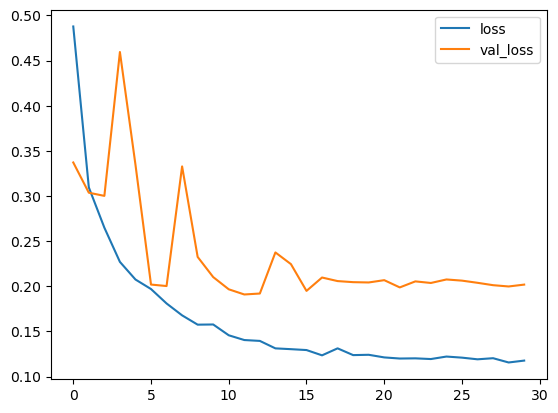

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [27]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

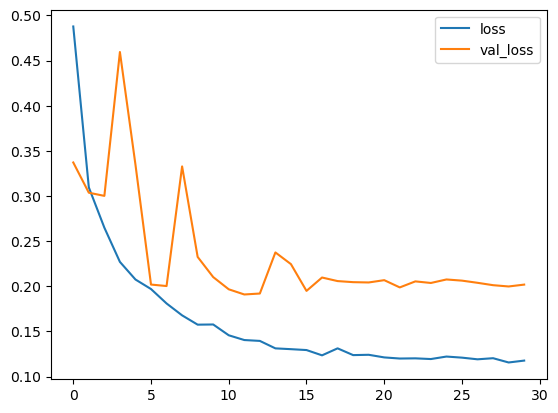

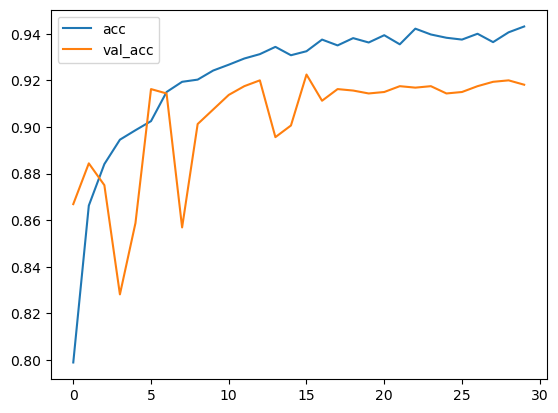

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [28]:
losses[['acc','val_acc']].plot()

In [29]:
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

63/63 [==============================] - 1s 21ms/step - loss: 0.1692 - acc: 0.9435
Model evaluation accuracy:  94 %


In [30]:
model.save('heart_sounds.h5')

In [31]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

63/63 [==============================] - 3s 20ms/step
prediction test return : 2 - normal


In [32]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  # pad audio file same duration
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [33]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

63/63 [==============================] - 1s 22ms/step


In [34]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.51      0.84      0.63        86
      murmur       0.95      0.97      0.96       405
      normal       0.98      0.94      0.96      1509

    accuracy                           0.94      2000
   macro avg       0.81      0.92      0.85      2000
weighted avg       0.96      0.94      0.95      2000



In [35]:
import tensorflow as tf

input_shape = (25,)

input_layer = tf.keras.layers.Input(shape=input_shape)

hidden_layer1 = tf.keras.layers.Dense(1024, activation='relu')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(512, activation='relu')(hidden_layer1)
dropout_layer_1 = tf.keras.layers.Dropout(0.5)(hidden_layer2)
hidden_layer3 = tf.keras.layers.Dense(256, activation='relu')(dropout_layer_1)
hidden_layer4 = tf.keras.layers.Dense(128, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer4)
dropout_layer_2 = tf.keras.layers.Dropout(0.5)(hidden_layer5)
hidden_layer4 = tf.keras.layers.Dense(32, activation='relu')(dropout_layer_2)
output_layer = tf.keras.layers.Dense(3, activation='softmax')(hidden_layer5)

model2 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              26624     
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256  

In [36]:
model2.fit(x_train,y_train,batch_size=1024,epochs=50)

Epoch 1/50
7/7 [==============================] - 4s 146ms/step - loss: 8.5067 - accuracy: 0.3798
Epoch 2/50
7/7 [==============================] - 1s 87ms/step - loss: 3.0908 - accuracy: 0.7570
Epoch 3/50
7/7 [==============================] - 1s 92ms/step - loss: 2.0863 - accuracy: 0.6977
Epoch 4/50
7/7 [==============================] - 1s 85ms/step - loss: 1.6576 - accuracy: 0.5763
Epoch 5/50
7/7 [==============================] - 1s 81ms/step - loss: 1.3879 - accuracy: 0.6695
Epoch 6/50
7/7 [==============================] - 1s 78ms/step - loss: 1.2460 - accuracy: 0.6858
Epoch 7/50
7/7 [==============================] - 1s 77ms/step - loss: 1.1399 - accuracy: 0.6583
Epoch 8/50
7/7 [==============================] - 1s 79ms/step - loss: 1.0623 - accuracy: 0.6767
Epoch 9/50
7/7 [==============================] - 1s 78ms/step - loss: 0.9682 - accuracy: 0.6884
Epoch 10/50
7/7 [==============================] - 1s 80ms/step - loss: 0.9197 - accuracy: 0.6983
Epoch 11/50
7/7 [===========

In [37]:
losses = pd.DataFrame(model2.history.history)
losses[['loss','val_loss']].plot()

KeyError: "['val_loss'] not in index"

In [38]:
losses[['acc','val_acc']].plot()


KeyError: "None of [Index(['acc', 'val_acc'], dtype='object')] are in the [columns]"

In [37]:
y_pred = model2.predict(x_test, batch_size=5)
#check scores
scores = model2.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

63/63 [==============================] - 1s 8ms/step - loss: 0.2463 - accuracy: 0.9080
Model evaluation accuracy:  91 %


In [38]:
y_pred = np.asarray(model2.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

63/63 [==============================] - 1s 7ms/step
prediction test return : 2 - normal


In [39]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.93      0.15      0.26        86
      murmur       0.88      0.82      0.85       405
      normal       0.91      0.97      0.94      1509

    accuracy                           0.91      2000
   macro avg       0.91      0.65      0.69      2000
weighted avg       0.91      0.91      0.90      2000



In [40]:
#Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split,KFold, GroupKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.metrics import roc_auc_score

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.layers import GlobalMaxPooling1D,BatchNormalization,Dense, Dropout, Input,Concatenate, LSTM, GRU,Bidirectional, Multiply

In [41]:
import keras
def create_model(activation,dropout_rate, learning_rate):
    x_input = Input(shape=(x_train.shape[-2:]))

    x0 = Bidirectional(LSTM(units=256, return_sequences=True))(x_input)
    x1 = Bidirectional(LSTM(units=512, return_sequences=True))(x0)
    x1 = BatchNormalization()(x1)

    x2 = Bidirectional(LSTM(units=256, return_sequences=True))(x1)
    z1 = Bidirectional(GRU(units=256, return_sequences=True))(x1)    
    c = Concatenate(axis=2)([x2, z1])
    c = BatchNormalization()(c)
    c = Dropout(dropout_rate)(c)

    x3 = Bidirectional(LSTM(units=256, return_sequences=True))(c)
    x4 = GlobalMaxPooling1D()(x3)
    x4 = BatchNormalization()(x4)

    x5 = Dense(units=128, activation=activation)(x4)
    x_output = Dense(4, activation="softmax")(x5)

    model = Model(inputs=x_input, outputs=x_output, name='lstm_model')
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    learning_rate_schedule = keras.optimizers.schedules.ExponentialDecay( initial_learning_rate=learning_rate,decay_steps=10000,decay_rate=0.5)
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate_schedule), metrics=['accuracy'])
    
    return model

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'selu'],
}

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=256, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

C:\conda_tmp\ipykernel_7236\1165851283.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=256, verbose=1)
C:\Users\Public\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Public\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    

AttributeError: module 'keras.optimizers.schedules' has no attribute 'ExponentialDecay'

In [ ]:
best_dropout_rate = grid_result.best_params_['dropout_rate']
best_learning_rate = grid_result.best_params_['learning_rate']
best_activation_function  = grid_result.best_params_['activation']

In [ ]:
print(best_dropout_rate,best_learning_rate, best_activation_function)

In [ ]:
losses = pd.DataFrame(grid.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['acc','val_acc']].plot()

In [ ]:
y_pred = grid.predict(x_test, batch_size=5)
#check scores
scores = grid.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

In [ ]:
y_pred = np.asarray(grid.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

In [46]:
def dnn_model():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x0 = Bidirectional(LSTM(units=256, return_sequences=True))(x_input)
    x1 = Bidirectional(LSTM(units=512, return_sequences=True))(x0)
    x2 = Bidirectional(LSTM(units=256, return_sequences=True))(x1)
    z1 = Bidirectional(GRU(units=256, return_sequences=True))(x1)
    
    c = Concatenate(axis=2)([x2, z1])
    
    x3 = Bidirectional(LSTM(units=256, return_sequences=True))(c)
    
    x4 = GlobalMaxPooling1D()(x3)
    x5 = Dense(units=128, activation='selu')(x4)
    x_output = Dense(4, activation='softmax')(x5)
    #x_output =  tf.round(tf.argmax(x_output, axis=-1)) # use tf.argmax here
    model = Model(inputs=x_input, outputs=x_output, name='lstm_model')
    
    return model

model4 = dnn_model()

NameError: name 'train' is not defined

In [47]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = tpu_strategy.num_replicas_in_sync * 64
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 256
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

Running on 1 replicas
Batch Size: 256


In [48]:
VERBOSE = 64
    #BATCH_SIZE = 4
predictions, scores = [], []
k = GroupKFold(n_splits = 6)

for fold, (train_idx, val_idx) in enumerate(k.split(train, labels, groups.unique())):
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)

        X_train, X_val = train[train_idx], train[val_idx]
        y_train, y_val = labels.iloc[train_idx].values, labels.iloc[val_idx].values

        model4 = dnn_model()
        model4.compile(optimizer="adam", loss='categorical_crossentropy', metrics='AUC')

        lr = ReduceLROnPlateau(monitor="val_auc", factor=0.6, 
                               patience=5, verbose=VERBOSE)

        es = EarlyStopping(monitor="val_auc", patience=10, 
                           verbose=VERBOSE, mode="max", 
                           restore_best_weights=True)

        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
        chk_point = ModelCheckpoint(f'./TPS_model_1_2022_{fold+1}C.h5', options=save_locally, 
                                    monitor='val_auc', verbose=VERBOSE, 
                                    save_best_only=True, mode='max')

        model4.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=25,
                  verbose=VERBOSE,
                  batch_size=BATCH_SIZE, 
                  callbacks=[lr, chk_point, es])

        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = load_model(f'./TPS_model_1_2022_{fold+1}C.h5', options=load_locally)

        y_pred = model4.predict(X_val, batch_size=BATCH_SIZE).squeeze()
        score = roc_auc_score(y_val, y_pred)
        scores.append(score)
        predictions.append(model.predict(test, batch_size=BATCH_SIZE).squeeze())
        print(f"model1,Fold-{fold+1} | OOF Score: {score}")

print(f'Mean accuracy on {k.n_splits} folds - {np.mean(scores)}')

NameError: name 'train' is not defined

In [49]:
y_val = np.round(np.argmax(y_val, axis =1))
y_val

array([2, 2, 1, ..., 0, 2, 2], dtype=int64)

In [ ]:
y_pred =  np.round(np.argmax(y_pred, axis =1))
y_pred

In [ ]:
np.mean(y_pred == y_val)

In [ ]:
predictions

In [ ]:
losses = pd.DataFrame(model4.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['acc','val_acc']].plot()

In [ ]:
y_pred = model4.predict(x_test, batch_size=5)
#check scores
scores = model4.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

In [ ]:
y_pred = np.asarray(model4.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

In [ ]:
def dnn_model2():
    
    x_input = Input(shape=(train.shape[-2:]))
    xi = Bidirectional(LSTM(units=128, return_sequences=True))(x_input)
    x0 = Bidirectional(LSTM(units=256, return_sequences=True))(xi)
    x00 = Bidirectional(LSTM(units=512, return_sequences=True))(x0)
    x1 = Bidirectional(LSTM(units=256, return_sequences=True))(x00)
    
    x2 = Bidirectional(LSTM(units=256, return_sequences=True))(x1)
    z1 = Bidirectional(GRU(units=256, return_sequences=True))(x1)
    
    c = Concatenate(axis=2)([x2, z1])
    
    x3 = Bidirectional(LSTM(units=256, return_sequences=True))(c)
    
    x4 = GlobalMaxPooling1D()(x3)
    x5 = Dense(units=128, activation='selu')(x4)
    x6 = Dense(units=64, activation='selu')(x5)
    x_output = Dense(4, activation='softmax')(x6)

    model = Model(inputs=x_input, outputs=x_output, name='lstm_model2')
    
    return model

model5 = dnn_model2()

In [ ]:
VERBOSE = 64
#   BATCH_SIZE = 256
predictions, scores,accuracy = [], [],[]
k = GroupKFold(n_splits = 6)

for fold, (train_idx, val_idx) in enumerate(k.split(train, labels, groups.unique())):
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)

        X_train, X_val = train[train_idx], train[val_idx]
        y_train, y_val = labels.iloc[train_idx].values, labels.iloc[val_idx].values

        model5 = dnn_model2()
        model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics='AUC')

        lr = ReduceLROnPlateau(monitor="val_auc", factor=0.6, 
                               patience=5, verbose=VERBOSE)

        es = EarlyStopping(monitor="val_auc", patience=10, 
                           verbose=VERBOSE, mode="max", 
                           restore_best_weights=True)

        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
        chk_point = ModelCheckpoint(f'./TPS_model_1_2022_{fold+1}C.h5', options=save_locally, 
                                    monitor='val_auc', verbose=VERBOSE, 
                                    save_best_only=True, mode='max')

        model5.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=25,
                  verbose=VERBOSE,
                  batch_size=BATCH_SIZE, 
                  callbacks=[lr, chk_point, es])

        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = load_model(f'./TPS_model_1_2022_{fold+1}C.h5', options=load_locally)

        y_pred = model5.predict(X_val, batch_size=BATCH_SIZE).squeeze()
        score = roc_auc_score(y_val, y_pred)
        scores.append(score)
        correct_predictions = tf.equal(tf.argmax(y_val, axis=1), tf.argmax(y_pred, axis=1))
        acc = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
        accuracy.append(acc.numpy())
        predictions.append(model.predict(test, batch_size=BATCH_SIZE).squeeze())
        print(f"model1,Fold-{fold+1} | OOF Score: {score}")

print(f'Mean accuracy on {k.n_splits} folds - {np.mean(scores)}')

In [ ]:
accuracy

In [ ]:
losses = pd.DataFrame(model5.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['acc','val_acc']].plot()

In [ ]:
y_pred = model5.predict(x_test, batch_size=5)
#check scores5scores = model4.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

In [ ]:
y_pred = np.asarray(model5.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))